In [1]:
from sklearn.manifold import TSNE
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# AWS
drive_path = '/data/dynamic-brain-workshop/visual_coding_neuropixels'

In [3]:
# We need to import these modules to get started
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
%matplotlib inline
# %matplotlib notebook

In [4]:
# Provide path to manifest file
manifest_file = os.path.join(drive_path,'ephys_manifest.csv')

# Create a dataframe 
expt_info_df = pd.read_csv(manifest_file)

# Display information contained in the dataframe
expt_info_df

,nwb_filename,experiment_type,VISp,VISal,VISam,VISl,VISpm,VISrl,locally_sparse_noise,gabor,drifting_gratings,static_gratings,natural_scenes,natural_movie_3,full_field_flashes
0,ephys_single_14.nwb,single_probe,True,False,False,False,False,False,True,False,True,True,True,True,True
1,ephys_single_15.nwb,single_probe,True,False,False,False,False,False,True,False,True,True,True,True,True
2,ephys_single_16.nwb,single_probe,True,False,False,False,False,False,True,False,True,True,True,True,True
3,ephys_single_39.nwb,single_probe,True,False,False,False,False,False,True,False,True,True,True,True,True
4,ephys_single_51.nwb,single_probe,True,False,False,False,False,False,True,False,True,True,True,True,True
5,ephys_multi_84.nwb,multi_probe,True,True,True,False,True,True,True,True,True,True,True,True,True
6,ephys_multi_58.nwb,multi_probe,True,True,True,True,True,True,False,True,True,True,True,True,True
7,ephys_multi_10.nwb,multi_probe,True,True,True,True,True,True,False,True,True,True,True,True,True
8,ephys_multi_21.nwb,multi_probe,True,False,True,True,True,False,False,True,True,True,True,True,True


In [5]:
# Make new dataframe by selecting only single-probe experiments
single_probe_expt_info = expt_info_df[expt_info_df.experiment_type == 'single_probe']

print('Number of single-probe experiments: %s') %len(single_probe_expt_info)

# Display information about single probe expts
single_probe_expt_info

Number of single-probe experiments: 5


,nwb_filename,experiment_type,VISp,VISal,VISam,VISl,VISpm,VISrl,locally_sparse_noise,gabor,drifting_gratings,static_gratings,natural_scenes,natural_movie_3,full_field_flashes
0,ephys_single_14.nwb,single_probe,True,False,False,False,False,False,True,False,True,True,True,True,True
1,ephys_single_15.nwb,single_probe,True,False,False,False,False,False,True,False,True,True,True,True,True
2,ephys_single_16.nwb,single_probe,True,False,False,False,False,False,True,False,True,True,True,True,True
3,ephys_single_39.nwb,single_probe,True,False,False,False,False,False,True,False,True,True,True,True,True
4,ephys_single_51.nwb,single_probe,True,False,False,False,False,False,True,False,True,True,True,True,True


In [6]:
#make new dataframe by selecting only multi-probe experiments
multi_probe_expt_info = expt_info_df[expt_info_df.experiment_type == 'multi_probe']
multi_probe_expt_info

,nwb_filename,experiment_type,VISp,VISal,VISam,VISl,VISpm,VISrl,locally_sparse_noise,gabor,drifting_gratings,static_gratings,natural_scenes,natural_movie_3,full_field_flashes
5,ephys_multi_84.nwb,multi_probe,True,True,True,False,True,True,True,True,True,True,True,True,True
6,ephys_multi_58.nwb,multi_probe,True,True,True,True,True,True,False,True,True,True,True,True,True
7,ephys_multi_10.nwb,multi_probe,True,True,True,True,True,True,False,True,True,True,True,True,True
8,ephys_multi_21.nwb,multi_probe,True,False,True,True,True,False,False,True,True,True,True,True,True


In [7]:
# Import NWB_adapter
from swdb_2018_neuropixels.ephys_nwb_adapter import NWB_adapter

In [8]:
# Choose filename from one row from the multi_probe experiments dataframe
multi_probe_example = 0 # index to row in multi_probe_expt_info
multi_probe_filename  = multi_probe_expt_info.iloc[multi_probe_example]['nwb_filename']
print multi_probe_filename

# Specify full path to the .nwb file
nwb_file = os.path.join(drive_path,multi_probe_filename)

ephys_multi_84.nwb


In [9]:
data_set = NWB_adapter(nwb_file)

In [10]:
# Probe names and corresponding cortical regions
data_set.probe_list, data_set.region_list

(['probeA', 'probeB', 'probeC', 'probeD', 'probeE', 'probeF'],
 ['VISam', 'VISpm', 'VISp', 'VISl', 'VISal', 'VISrl'])

In [11]:
# SOLUTION
data_set.number_cells

{'probeA': 39,
 'probeB': 218,
 'probeC': 99,
 'probeD': 91,
 'probeE': 169,
 'probeF': 123}

In [12]:
# List of all units recorded on probeC
probeC_unit_list = data_set.unit_list['probeC']

In [13]:
# SOLUTION
# print unit ID for first 20 units
print(probeC_unit_list[:20]) 

['213' '130' '135' '24' '29' '120' '52' '297' '319' '318' '313' '312' '311'
 '310' '317' '193' '192' '271' '88' '110']


In [14]:
# Look at the first five entries in the unit_df dataframe
data_set.unit_df.head()

,unit_id,probe,structure,snr,depth,channel
0,339,probeA,VISam,4.21624,-2680,117
1,338,probeA,VISam,1.98126,-3700,14
2,335,probeA,VISam,6.83645,-2460,138
3,334,probeA,VISam,3.88888,-2460,138
4,337,probeA,VISam,2.34072,-2820,103


In [15]:
# List of structures from which units were recorded
# np.unique(data_set.unit_df['structure'])
np.unique(data_set.unit_df['probe'])

array(['probeA', 'probeB', 'probeC', 'probeD', 'probeE', 'probeF'], dtype=object)

In [16]:
# Specify the probe
probe_name = 'probeC'

# Speciy the region
region_name = 'VISp'

# Subset df
v1_unit_df = data_set.unit_df[data_set.unit_df['structure']==region_name]

# Display first 5 entries
v1_unit_ids = v1_unit_df['unit_id'].values

In [17]:
# Make a list of unit_ids that are in VISp on probeC
v1_unit_list = list(v1_unit_df['unit_id'].values)

# How many units in VISp? 
print len(v1_unit_list)

98


In [18]:
# Get all spike times from probeC units
probe_spikes = data_set.spike_times[probe_name]

# Look at the first 5 unit IDs in probe_spikes
print probe_spikes.keys()[:5]

['213', '130', '135', '24', '29']


In [19]:
# Get the stim table for natural scenes
ns_table = data_set.get_stimulus_table('natural_scenes')

In [20]:
ns_table.head()

,start,end,frame
0,6342.87692,6343.14141,30.0
1,6343.14141,6343.39195,98.0
2,6343.39195,6343.64130,52.0
3,6343.64130,6343.89175,110.0
4,6343.89175,6344.14246,79.0


In [21]:
print(len(ns_table[ns_table.frame==41]))
print(np.sort(ns_table.frame.unique()))

50
[  -1.    0.    1.    2.    3.    4.    5.    6.    7.    8.    9.   10.
   11.   12.   13.   14.   15.   16.   17.   18.   19.   20.   21.   22.
   23.   24.   25.   26.   27.   28.   29.   30.   31.   32.   33.   34.
   35.   36.   37.   38.   39.   40.   41.   42.   43.   44.   45.   46.
   47.   48.   49.   50.   51.   52.   53.   54.   55.   56.   57.   58.
   59.   60.   61.   62.   63.   64.   65.   66.   67.   68.   69.   70.
   71.   72.   73.   74.   75.   76.   77.   78.   79.   80.   81.   82.
   83.   84.   85.   86.   87.   88.   89.   90.   91.   92.   93.   94.
   95.   96.   97.   98.   99.  100.  101.  102.  103.  104.  105.  106.
  107.  108.  109.  110.  111.  112.  113.  114.  115.  116.  117.]


In [22]:
# Select trials from stim table for specific image_id
image_id50 = 1
image_id51 = 2
image_id52 = 3
image_id53 = 4
image_id54 = 5
ns_table_50 = ns_table[ns_table.frame==image_id50] # This is the stim table for image 46
ns_table_51 = ns_table[ns_table.frame==image_id51] # This is the stim table for image 46
ns_table_52 = ns_table[ns_table.frame==image_id52] # This is the stim table for image 46
ns_table_53 = ns_table[ns_table.frame==image_id53] # This is the stim table for image 46
ns_table_54 = ns_table[ns_table.frame==image_id54] # This is the stim table for image 46

len(ns_table_50.start.values)

50

In [23]:
# Select spikes times from probe C
probeC_spikes = data_set.spike_times['probeC']

In [24]:
# SOLUTION
def image_psth(img,unit_spikes,ax=[]):
    
    #Default params
    if not ax:
        fig,ax = plt.subplots(1,1,figsize=(6,3))

    pre_time = 1.#.5
    post_time = 1.#.75

    all_trials = []
    # Get spike train for each trial
    for i,start in enumerate(img.start):
        spikes = unit_spikes[(unit_spikes > start-pre_time) & (unit_spikes < start+post_time)]
        spikes = spikes - start
        all_trials.append(list(spikes))

    # Make PSTH for each trial with 10 ms bins
    bin_width = 0.005
    bins = np.arange(-pre_time,post_time+bin_width,bin_width)   
    all_counts = []
    for trial in all_trials:
        c,edges = np.histogram(trial,bins)
        c = c/bin_width#np.diff(bins[0:2])
        all_counts.append(c)
    centers = edges[:-1] + np.diff(bins)/2
    
    # Plot mean PSTH across trials
    ax.plot(centers,np.mean(all_counts,axis=0))
    ax.axvspan(0,0.25,color='gray',alpha=0.1)
    ax.set_ylabel('Firing rate (spikes/second)')
    ax.set_xlabel('Time (s)')
    ax.set_xlim(pre_time,post_time)

    return ax


# GENERATE PSTH
def gen_psth(img,unit_spikes):
    
    time_width = 0.25

    all_trials = []
    # Get spike train for each trial
    for i,start in enumerate(img.start):
#         stop   = img.end.values[i]
        spikes = unit_spikes[(unit_spikes > start) & (unit_spikes < start+time_width)]
        spikes = spikes - start
        all_trials.append(list(spikes))

    # Make PSTH for each trial with 10 ms bins
    bin_width = 0.005
    bins = np.arange(0,time_width+bin_width,bin_width)   
    all_counts = []
    for trial in all_trials:
        c,edges = np.histogram(trial,bins)
        c = c/bin_width#np.diff(bins[0:2])
        all_counts.append(c)
    centers = edges[:-1] + np.diff(bins)/2
    
    return np.mean(all_counts,axis=0)

# GENERATE SINGLE TRIAL FR
def trial_fr(img,unit_spikes):
    
    time_width = 0.25
    bin_width = 0.25
    bins = np.arange(0,time_width+bin_width,bin_width)   

    all_trials = np.zeros((len(bins)-1,50))
    # Get spike train for each trial
    for i,start in enumerate(img.start):
#         stop   = img.end.values[i]
        spikes = unit_spikes[(unit_spikes > start) & (unit_spikes < start+time_width)]
        spikes = spikes - start
        c,edges = np.histogram(spikes,bins)
        c = c/bin_width#np.diff(bins[0:2])
        all_trials[:,i] = c

    return all_trials

#         all_trials.append(list(spikes))

    # Make PSTH for each trial with 10 ms bins
#     all_counts = []
#     for trial in all_trials:
#         c,edges = np.histogram(trial,bins)
#         c = c/bin_width#np.diff(bins[0:2])
#         all_counts.append(c)
#     centers = edges[:-1] + np.diff(bins)/2
    


/home/ec2-user/anaconda3/envs/python2/lib/python2.7/site-packages/matplotlib/axes/_base.py:3124: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=1.0, right=1.0
  'left=%s, right=%s') % (left, right))


(-0.5, 0.75)

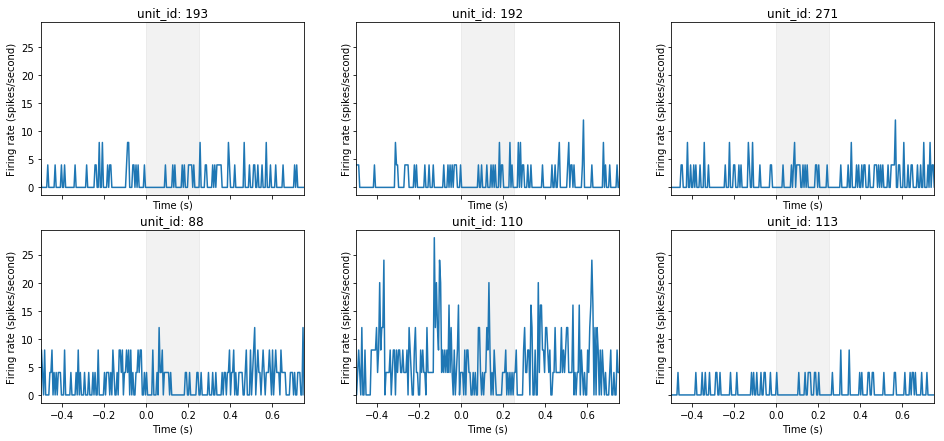

In [25]:
# Figure setup
fig,ax = plt.subplots(2,3,figsize=(16,7),sharex=True,sharey=True)
ax = ax.ravel()

for i,unit in enumerate(v1_unit_ids[15:21]):
    unit_spikes = probeC_spikes[unit]
    image_psth(ns_table_51,unit_spikes,ax[i])
    ax[i].set_title('unit_id: ' + unit)
    
ax[0].set_xlim(-0.5,0.75)

In [26]:
# # Trial-averaged firing rate of neurons 
# units_psth_50 = np.zeros((50,len(v1_unit_ids)))
# units_psth_51 = np.zeros((50,len(v1_unit_ids)))
# units_psth_52 = np.zeros((50,len(v1_unit_ids)))
# units_psth_53 = np.zeros((50,len(v1_unit_ids)))
# units_psth_54 = np.zeros((50,len(v1_unit_ids)))

# for i in range(len(v1_unit_ids)):
#     unit = v1_unit_ids[i]
#     unit_spikes = probeC_spikes[unit]
#     units_psth_50[:,i] = gen_psth(ns_table_50,unit_spikes)
#     units_psth_51[:,i] = gen_psth(ns_table_51,unit_spikes)
#     units_psth_52[:,i] = gen_psth(ns_table_52,unit_spikes)
#     units_psth_53[:,i] = gen_psth(ns_table_53,unit_spikes)
#     units_psth_54[:,i] = gen_psth(ns_table_54,unit_spikes)
    

# Trial-by-trial firing rate of neurons 
ntrials = 50
nbins = 1
units_t2t_50 = np.zeros((nbins,ntrials,len(v1_unit_ids)))
units_t2t_51 = np.zeros((nbins,ntrials,len(v1_unit_ids)))
units_t2t_52 = np.zeros((nbins,ntrials,len(v1_unit_ids)))
units_t2t_53 = np.zeros((nbins,ntrials,len(v1_unit_ids)))
units_t2t_54 = np.zeros((nbins,ntrials,len(v1_unit_ids)))

for cell in range(len(v1_unit_ids)):
    unit = v1_unit_ids[cell]
    unit_spikes = probeC_spikes[unit]
    units_t2t_50[:,:,cell] = trial_fr(ns_table_50,unit_spikes)
    units_t2t_51[:,:,cell] = trial_fr(ns_table_51,unit_spikes)
    units_t2t_52[:,:,cell] = trial_fr(ns_table_52,unit_spikes)
    units_t2t_53[:,:,cell] = trial_fr(ns_table_53,unit_spikes)
    units_t2t_54[:,:,cell] = trial_fr(ns_table_54,unit_spikes)
    
units_t2t_50.shape    

(1, 50, 98)

Text(0,0.5,'Neuron index')

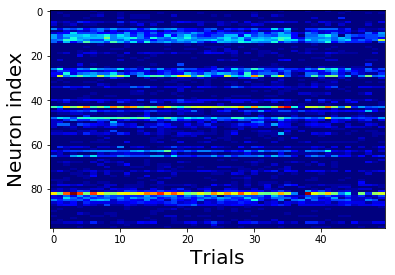

In [46]:
plt.imshow(np.transpose(units_t2t_50[0,:,:]),cmap='jet',aspect='auto')
plt.xlabel('Trials',fontsize=20)
plt.ylabel('Neuron index',fontsize=20)
plt.title('Img ')

In [ ]:
plt.imshow(np.transpose(units_t2t_50[0,:,:]),cmap='jet',aspect='auto')
plt.xlabel('Trials',fontsize=20)
plt.ylabel('Neuron index',fontsize=20)

In [28]:
# plt.imshow(np.transpose(units_psth_46),cmap='jet',aspect='auto')
# plt.ylim([0,40])

In [29]:
# units_psth_50_flat = units_psth_50.flatten()
# units_psth_51_flat = units_psth_51.flatten()
# units_psth_52_flat = units_psth_52.flatten()
# units_psth_53_flat = units_psth_53.flatten()
# units_psth_54_flat = units_psth_54.flatten()

# data = np.zeros((5,len(units_psth_50_flat)))
# data[0,:] = units_psth_50_flat
# data[1,:] = units_psth_51_flat
# data[2,:] = units_psth_52_flat
# data[3,:] = units_psth_53_flat
# data[4,:] = units_psth_54_flat

num_img   = 5
num_trial = 50
num_bins  = 1
num_cellxbins  = len(v1_unit_ids)*num_bins
units_t2t_50_flat = np.zeros((num_trial,num_cellxbins))
units_t2t_51_flat = np.zeros((num_trial,num_cellxbins))
units_t2t_52_flat = np.zeros((num_trial,num_cellxbins))
units_t2t_53_flat = np.zeros((num_trial,num_cellxbins))
units_t2t_54_flat = np.zeros((num_trial,num_cellxbins))

for i in range(num_trial):
    units_t2t_50_flat[i,:] = units_t2t_50[:,i,:].flatten()
    units_t2t_51_flat[i,:] = units_t2t_51[:,i,:].flatten()
    units_t2t_52_flat[i,:] = units_t2t_52[:,i,:].flatten()
    units_t2t_53_flat[i,:] = units_t2t_53[:,i,:].flatten()
    units_t2t_54_flat[i,:] = units_t2t_54[:,i,:].flatten()
    
data = np.concatenate((units_t2t_50_flat,units_t2t_51_flat,units_t2t_52_flat,units_t2t_53_flat,units_t2t_54_flat),axis=0)





In [ ]:
tsne = TSNE(n_components=2,init='pca', random_state=0,perplexity=30,n_iter=1000)
tsne_proj = tsne.fit_transform(data)

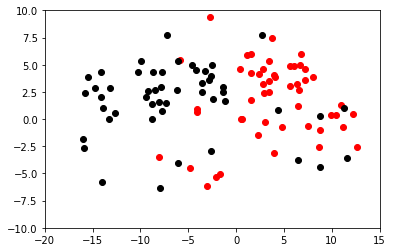

In [38]:
tsne_proj.shape

# %matplotlib tk
%matplotlib inline

# plt.scatter(tsne_proj[0:50,0],tsne_proj[0:50,1],color='cyan')
# plt.scatter(tsne_proj[50:100,0],tsne_proj[50:100,1],color='blue')
# plt.scatter(tsne_proj[100:150,0],tsne_proj[100:150,1],color='green')
plt.scatter(tsne_proj[150:200,0],tsne_proj[150:200,1],color='red')
plt.scatter(tsne_proj[200:250,0],tsne_proj[200:250,1],color='black')

plt.xlim([-20,15])
plt.ylim([-10,10])
plt.savefig('two_img.pdf')

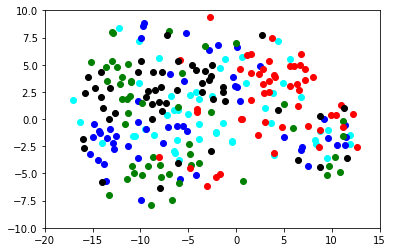

In [39]:
plt.scatter(tsne_proj[0:50,0],tsne_proj[0:50,1],color='cyan')
plt.scatter(tsne_proj[50:100,0],tsne_proj[50:100,1],color='blue')
plt.scatter(tsne_proj[100:150,0],tsne_proj[100:150,1],color='green')
plt.scatter(tsne_proj[150:200,0],tsne_proj[150:200,1],color='red')
plt.scatter(tsne_proj[200:250,0],tsne_proj[200:250,1],color='black')

plt.xlim([-20,15])
plt.ylim([-10,10])
plt.savefig('five_img.pdf')


In [ ]:
xx = units_t2t_50[:,1,:].flatten()
np.sum(xx)

In [ ]:
plt.plot(units_psth_50_flat,units_psth_46_flat,'o')

In [ ]:
data


In [ ]:
xx = np.zeros((2,4))
# print(np.mean(xx,axis=1))
xx
